In [24]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [25]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [26]:
plt.ion()
plt.style.use('seaborn-colorblind')

In [27]:
conn = sqlite3.connect('sql/sql.db')
cursor = conn.cursor()

In [28]:
f = io.open('sql/trabalho.sql', 'r', encoding='ISO-8859-1')
sql = f.read()
cursor.executescript(sql)

OperationalError: table ANSWERS already exists

In [29]:
def boostreap(p,n_size = 500):
    values = np.zeros(n_size)
    
    d = pd.DataFrame(p)
    
    for i in range(n_size):
        sample = d[0].sample(replace = True,n = len(p))
        values[i] = sample.mean()
        
    return values

In [30]:
def gerarB(selecionados,df,n_size=500):
    p = []
    for country in selecionados:
        pais = df[df["COUNTRYCODE"] == country]

        for x in range(pais.shape[0]):
            sample = pais.iloc[x]
            for _ in range(int(sample["TAMANHO"])):
                p.append(sample["VALUE"])

    b = boostreap(p,n_size=n_size)
    
    return b

In [31]:
def separar(df,by,column = "COUNTRYCODE",n_size=50):
    indx = list(df.groupby(column).mean().sort_values(by).index)
    meio = int(len(indx)/2)

    maus = indx[:meio]
    bons = indx[meio:]
    
    print(by)
    
    print("Vermelho:",end="")
    
    for i in maus:
        c = df[df["COUNTRYCODE"] == i]["COUNTRY"].values[0]
        
        print(" {}".format(c),end = "")
        
    print()
    
    print("Verde:",end="")
    
    for i in bons:
        c = df[df["COUNTRYCODE"] == i]["COUNTRY"].values[0]
        
        print(" {}".format(c),end = "")
        
    print()
    
    bonsB = gerarB(bons,df,n_size=n_size)
    mausB = gerarB(maus,df,n_size=n_size)
    
    return [mausB,bonsB]

In [51]:
def plot_paises(i,df):
    data = df.groupby("COUNTRYCODE").mean()
    x = data['PESO'] / data['TAMANHO']    
    y = data[i]
    
    n = [rt2[i] for i in data.index]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    
    model = LinearRegression()
    model.fit([[i] for i in x],y)
    
    linha = [[x.min()],[x.max()]]
    y_pred = model.predict(linha)
    plt.plot(linha,y_pred)

    for j, txt in enumerate(n):
        ax.annotate(txt, (x.iloc[j], y.iloc[j]))

In [33]:
rt2 = {0: 'Austria',
 1: 'Belgium',
 2: 'Bulgaria',
 13: 'Croatia',
 3: 'Cyprus',
 4: 'Czech Rep',
 6: 'Denmark',
 7: 'Estonia',
 9: 'Finland',
 10: 'France',
 5: 'Germany',
 11: 'Great Britain',
 12: 'Greece',
 14: 'Hungary',
 15: 'Ireland',
 16: 'Italy',
 19: 'Latvia',
 17: 'Lithuania',
 18: 'Luxembourg',
 20: 'Malta',
 21: 'Netherlands',
 22: 'Poland',
 23: 'Portugal',
 24: 'Romania',
 27: 'Slovak Rep',
 26: 'Slovenia',
 8: 'Spain',
 25: 'Sweden'}

In [37]:
query = """
Select *
From Religion Natural join PESOS NATURAL JOIN ANSWERS NATURAL JOIN SIZE NATURAL JOIN Country

"""

df = pd.read_sql_query(query,conn)
df["Religiosity"] = 100 -(df["NonBeliever"] + df["Atheist"])
df["NonAtheist"] = 100 - df["Atheist"]
df["ReligiousAndAtheists"] = 100 - df["NonBeliever"]
df["TAMANHO"] = df["PERCENTAGE"] * df["VALOR"] * 0.01
df["PESO"] = df["TAMANHO"] * df["VALUE"]
df

,COUNTRYCODE,Catholic,Orthodox,Protestant,OtherChristian,TotalChristians,NonBeliever,Atheist,Muslim,QC,...,PERCENTAGE,NOTES,TIPO,VALOR,COUNTRY,Religiosity,NonAtheist,ReligiousAndAtheists,TAMANHO,PESO
0,0,66.5,2.2,7.2,1.9,77.8,15.4,4.1,1.5,e1,...,33,NULL,BIM,217,AT,80.5,95.9,84.6,71.61,0.000
1,0,66.5,2.2,7.2,1.9,77.8,15.4,4.1,1.5,e1,...,33,NULL,BIW,164,AT,80.5,95.9,84.6,54.12,0.000
2,0,66.5,2.2,7.2,1.9,77.8,15.4,4.1,1.5,e1,...,33,NULL,GAY,1558,AT,80.5,95.9,84.6,514.14,0.000
3,0,66.5,2.2,7.2,1.9,77.8,15.4,4.1,1.5,e1,...,33,NULL,LESBIAN,437,AT,80.5,95.9,84.6,144.21,0.000
4,0,66.5,2.2,7.2,1.9,77.8,15.4,4.1,1.5,e1,...,33,NULL,TRANS,167,AT,80.5,95.9,84.6,55.11,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22535,27,73.1,2.2,6.2,2.2,83.7,5.0,7.4,0.0,fb2_6,...,3,[0],BIM,61,SK,87.6,92.6,95.0,1.83,0.915
22536,27,73.1,2.2,6.2,2.2,83.7,5.0,7.4,0.0,fb2_6,...,3,[0],BIW,96,SK,87.6,92.6,95.0,2.88,1.440
22537,27,73.1,2.2,6.2,2.2,83.7,5.0,7.4,0.0,fb2_6,...,3,[0],GAY,584,SK,87.6,92.6,95.0,17.52,8.760
22538,27,73.1,2.2,6.2,2.2,83.7,5.0,7.4,0.0,fb2_6,...,3,[0],LESBIAN,144,SK,87.6,92.6,95.0,4.32,2.160


In [38]:
colunas = ["Religiosity","NonAtheist","ReligiousAndAtheists"]

Religiosity
Vermelho: CZ SE NL FR EE BE ES DK DE SI LV LU HU
Verde: AT FI SK IT PT IE HR LT PL BG MT GR CY RO


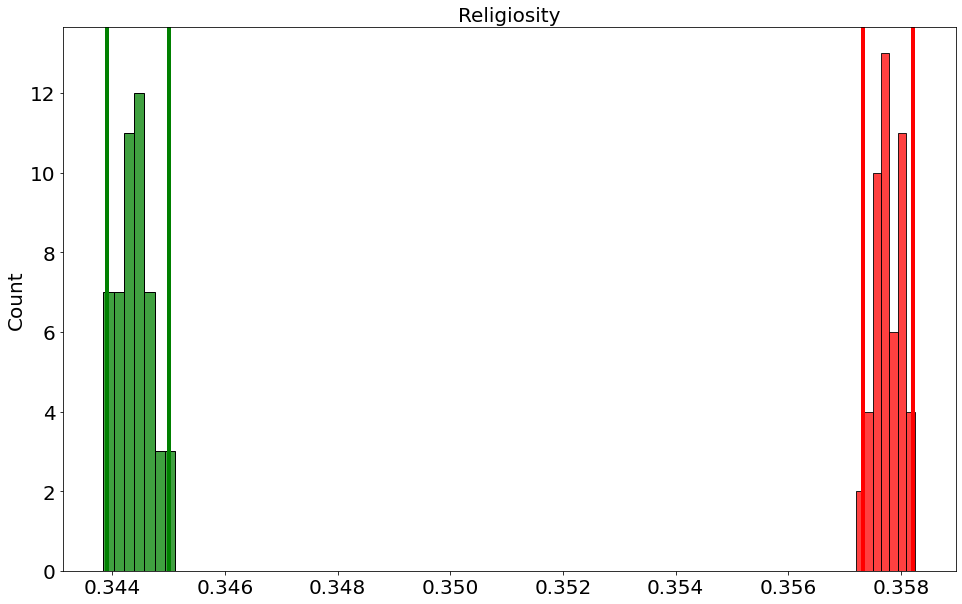

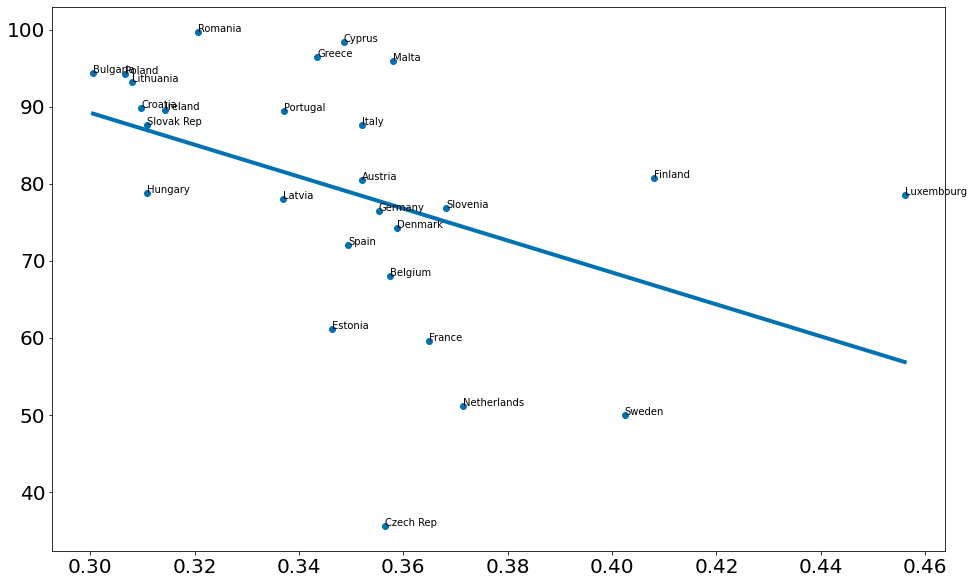

NonAtheist
Vermelho: CZ FR EE SE SI BE DK DE ES LU NL SK FI
Verde: LV IE IT AT PL HR MT HU LT BG PT GR CY RO


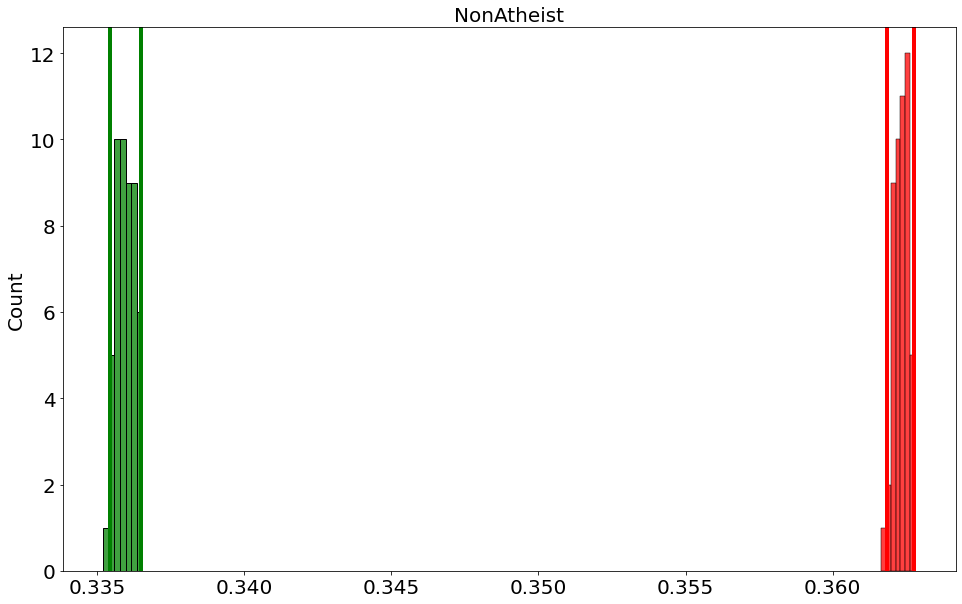

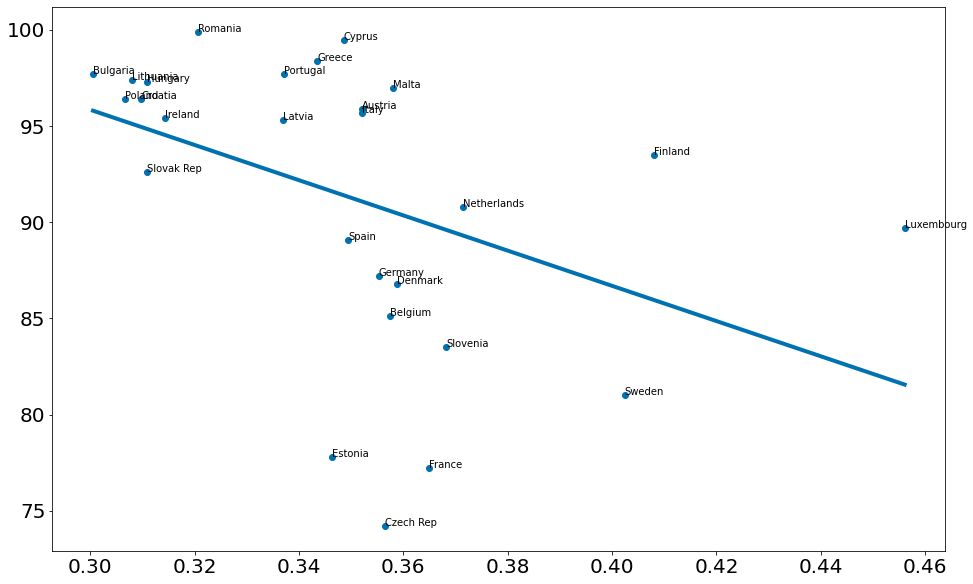

ReligiousAndAtheists
Vermelho: NL CZ SE HU FR LV BE ES EE AT FI DK LU
Verde: DE PT IT HR SI IE SK LT BG PL GR CY MT RO


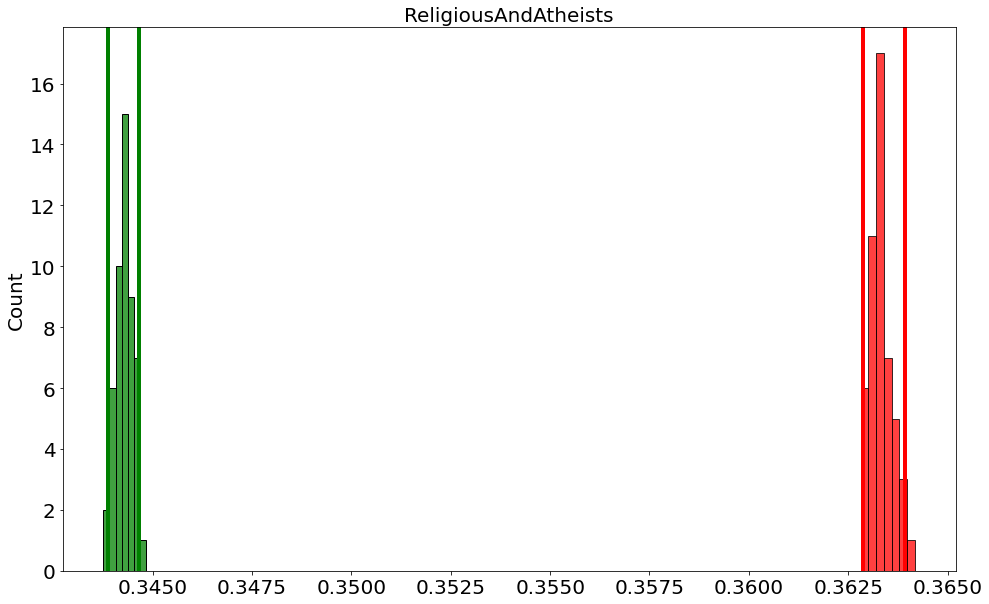

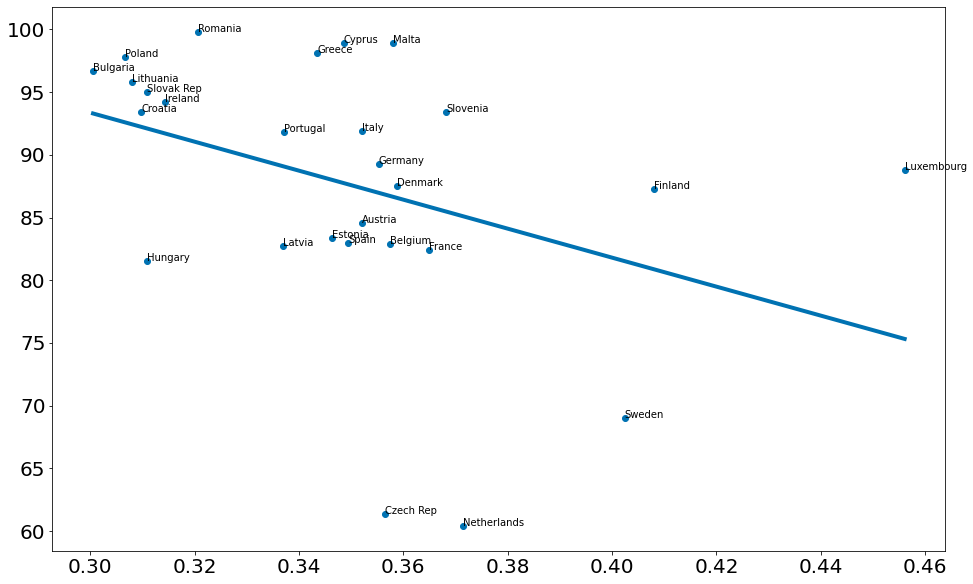

In [58]:
for i in colunas:
    mausB,bonsB = separar(df,i)
    
    sns.histplot(bonsB,color="g")
    inf = np.percentile(bonsB,2.5)
    sup = np.percentile(bonsB,97.5)
    plt.axvline(inf,color="g")
    plt.axvline(sup,color="g")

    sns.histplot(mausB,color="r")
    inf = np.percentile(mausB,2.5)
    sup = np.percentile(mausB,97.5)
    plt.axvline(inf,color="r")
    plt.axvline(sup,color="r")

    plt.title(i)

    plt.show()
    
    plot_paises(i,df)
    
    plt.show()
    
    

    Com base na análise dos dados é possível inferir, de maneira incerta, que a religosidade do país tem certa influência na violência sofrida por pessoas LGBT no mesmo país, embora esse resultado ainda seja preliminar. Foi possível notar através de algumas comparações que os países com maior percentual de ateus apresentaram níveis menores de violência contra LGBT's. Apesar disso a pesquisa ainda é muito nova e incerta tornando impossível ter conclusões muito certas e mais pesquisa é necessária para determinar a existência ou não de alguma relação. Adicionalmente os dados se referem apenas à Europa tornando impossível expandir qualquer conclusão tirada a partir deles para além do cenário europeu.
    A análise sobre o maior impacto do ateísmo se comparada ao agnósticismo foi feita comparando os valores como não agnósticos e não ateístas, bem como o de religiosidade. Já a análise da religiosidade e seu impacto na violência contra LGBT's foi feita no primeiro gráfico.
    